In [2]:
#Downloading, importing and installing all necessary libraries for the Capstone Project.

import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#importing JSON to handle json files
import json

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%pip install geocoder
import geocoder # to get coordinates

%pip install bs4
from bs4 import BeautifulSoup # library to parse HTML and XML documents

!conda install -c conda-forge lxml --yes #installing lxml to solve lxml issue

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

%pip install requests
%pip install requests_cache
import requests # library to handle requests
import requests_cache # Request_cache caches all calls to wikipedia and foursquare so we only have to do it once.


#We use regular expressions, e.g. to extract population count and city coordinates from scraped webpages
import re

#ast to parse a string to a dict
import ast

# find the distances
from scipy.spatial.distance import cdist

#We use NumPy and Scikit-learn for clustering

import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

print('Libraries imported.')

     |████████████████████████████████| 102kB 5.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829kB 7.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 122kB 3.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |          

## Parsing data into html and then creating Pandas Dataframe to store the data


In [3]:
#parsing data into html and then creating Pandas Dataframe to store the data

url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
London = pd.read_html(url) #reading Wikipedia url containing data
df_London = pd.DataFrame(London[0]) #Loading Data into Pandas Dataframe and reading the first 5 rows of data
df_London.head() # Checking that the data loaded is correctly flowing through in the Dataframe

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


## Deleting redundant columns out of the dataframe and retaining the same dataframe.

In [4]:
#Deleting redundant columns out of the dataframe and retaining the same dataframe.
df_London.drop({'Inner','Status','Political control','Headquarters'},axis=1,inplace=True)
df_London.head() # checking the changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,Barnet London Borough Council,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,Bexley London Borough Council,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,Brent London Borough Council,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,Bromley London Borough Council,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


## Adding new columns to the existing dataframe to convert Co-ordinates into Latitude and Longitude to be used with FourSquare API and cleaning up the DataFrame

In [5]:
# by default splitting is done on the basis of single space which is why we will need to create 4 columns and then later delete additionally created columns. 
df_London[['Coord1','Coord2', 'To Be Deleted','Latitude','Longitude']] = df_London['Co-ordinates'].str.split(expand=True)
df_London.head() # checking that the above changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Coord1,Coord2,To Be Deleted,Latitude,Longitude
0,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25,51°33′39″N,0°09′21″E﻿,/,﻿51.5607°N,0.1557°E
1,Barnet,Barnet London Borough Council,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31,51°37′31″N,0°09′06″W﻿,/,﻿51.6252°N,0.1517°W
2,Bexley,Bexley London Borough Council,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23,51°27′18″N,0°09′02″E﻿,/,﻿51.4549°N,0.1505°E
3,Brent,Brent London Borough Council,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12,51°33′32″N,0°16′54″W﻿,/,﻿51.5588°N,0.2817°W
4,Bromley,Bromley London Borough Council,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20,51°24′14″N,0°01′11″E﻿,/,﻿51.4039°N,0.0198°E


In [6]:
#Removing "°N" and "°E" from the column values of Latitude and Longitude, converting "°W" into minus values and then dropping "°W" from the column values 
df_London['Latitude'] = df_London['Latitude'].str.replace('°N','')
df_London['Longitude'] = df_London['Longitude'].str.replace('°E','')

df_London.loc[df_London['Longitude'].str.contains('°W'), 'Longitude']= '-' + df_London['Longitude']
df_London['Longitude']=df_London['Longitude'].str.replace('°W','')

df_London.head() # checking that the above changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Coord1,Coord2,To Be Deleted,Latitude,Longitude
0,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25,51°33′39″N,0°09′21″E﻿,/,﻿51.5607,0.1557
1,Barnet,Barnet London Borough Council,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31,51°37′31″N,0°09′06″W﻿,/,﻿51.6252,-0.1517
2,Bexley,Bexley London Borough Council,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23,51°27′18″N,0°09′02″E﻿,/,﻿51.4549,0.1505
3,Brent,Brent London Borough Council,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12,51°33′32″N,0°16′54″W﻿,/,﻿51.5588,-0.2817
4,Bromley,Bromley London Borough Council,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20,51°24′14″N,0°01′11″E﻿,/,﻿51.4039,0.0198


In [7]:
#Deleting additional columns out of the dataframe and retaining the same dataframe.
df_London.drop({'Co-ordinates','Coord1','Coord2','To Be Deleted'},axis=1,inplace=True)
df_London.head() #checking that the above changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Nr. in map,Latitude,Longitude
0,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,13.93,194352,25,﻿51.5607,0.1557
1,Barnet,Barnet London Borough Council,33.49,369088,31,﻿51.6252,-0.1517
2,Bexley,Bexley London Borough Council,23.38,236687,23,﻿51.4549,0.1505
3,Brent,Brent London Borough Council,16.70,317264,12,﻿51.5588,-0.2817
4,Bromley,Bromley London Borough Council,57.97,317899,20,﻿51.4039,0.0198


In [8]:
# Restricting the Search Area for the Coffee Shop to only those Boroughs where Nr. in Map is less than 12 i.e. These Boroughs are closest to Central London
df_London_clean = df_London[df_London['Nr. in map'] < 12].reset_index(drop=True)
df_London_clean.head(11) #checking that the above changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Nr. in map,Latitude,Longitude
0,Camden,Camden London Borough Council,8.40,229719,11,﻿51.5290,-0.1255
1,Hackney,Hackney London Borough Council,7.36,257379,9,﻿51.5450,-0.0553
2,Hammersmith and Fulham [note 4],Hammersmith and Fulham London Borough Council,6.33,178685,4,﻿51.4927,-0.2339
3,Islington,Islington London Borough Council,5.74,215667,10,﻿51.5416,-0.1022
4,Kensington and Chelsea,Kensington and Chelsea London Borough Council,4.68,155594,3,﻿51.5020,-0.1947
5,Lambeth,Lambeth London Borough Council,10.36,314242,6,﻿51.4607,-0.1163
6,Southwark,Southwark London Borough Council,11.14,298464,7,﻿51.5035,-0.0804
7,Tower Hamlets,Tower Hamlets London Borough Council,7.63,272890,8,﻿51.5099,-0.0059
8,Wandsworth,Wandsworth London Borough Council,13.23,310516,5,﻿51.4567,-0.1910
9,Westminster,Westminster City Council,8.29,226841,2,﻿51.4973,-0.1372


In [9]:
#Adding City of London Borough data from the Wikipedia page https://en.wikipedia.org/wiki/List_of_London_boroughs which was not included in the Dataframe as it was a separate table
df_London_clean.loc[10]=['City of London','Corporation of London','1.12','7000','1','51.5155','-0.0922']
df_London_clean.head(11) #checking that the above changes have been processed correctly

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Nr. in map,Latitude,Longitude
0,Camden,Camden London Borough Council,8.4,229719,11,﻿51.5290,-0.1255
1,Hackney,Hackney London Borough Council,7.36,257379,9,﻿51.5450,-0.0553
2,Hammersmith and Fulham [note 4],Hammersmith and Fulham London Borough Council,6.33,178685,4,﻿51.4927,-0.2339
3,Islington,Islington London Borough Council,5.74,215667,10,﻿51.5416,-0.1022
4,Kensington and Chelsea,Kensington and Chelsea London Borough Council,4.68,155594,3,﻿51.5020,-0.1947
5,Lambeth,Lambeth London Borough Council,10.36,314242,6,﻿51.4607,-0.1163
6,Southwark,Southwark London Borough Council,11.14,298464,7,﻿51.5035,-0.0804
7,Tower Hamlets,Tower Hamlets London Borough Council,7.63,272890,8,﻿51.5099,-0.0059
8,Wandsworth,Wandsworth London Borough Council,13.23,310516,5,﻿51.4567,-0.1910
9,Westminster,Westminster City Council,8.29,226841,2,﻿51.4973,-0.1372


In [10]:
#Converting 'Nr. in map' to Float first and then sorting the Dataframe based on Nr. in map.
df_London_clean['Nr. in map'] = df_London_clean['Nr. in map'].astype(float)
df_London_sorted = df_London_clean.sort_values('Nr. in map', ascending = True).reset_index(drop=True) #storing the sorted values in new dataframe
latitude = [51.5155,51.4973,51.5020,51.4927,51.4567,51.4607,51.5035,51.5099,51.5450,51.5416,51.5290] #creating a list with Latitude details to be merged in dataframe later
df_London_sorted['Latitude1']=latitude # adding new column to tackle the error of string to float conversion issue and adding the list latitude to the column
df_London_sorted.drop({'Latitude'},axis=1,inplace=True) # deleting Latitude column as it contains symbols with float stored as object which cannot be converted to float.
df_London_sorted.rename(columns = {'Latitude1':'Latitude'},inplace=True) #renaming the newly added column Latitude1 to Latitude
df_London_sorted #checking that the dataframe changes above have been correctly processed

,Borough,Local authority,Area (sq mi),Population (2013 est)[1],Nr. in map,Longitude,Latitude
0,City of London,Corporation of London,1.12,7000,1.0,-0.0922,51.5155
1,Westminster,Westminster City Council,8.29,226841,2.0,-0.1372,51.4973
2,Kensington and Chelsea,Kensington and Chelsea London Borough Council,4.68,155594,3.0,-0.1947,51.5020
3,Hammersmith and Fulham [note 4],Hammersmith and Fulham London Borough Council,6.33,178685,4.0,-0.2339,51.4927
4,Wandsworth,Wandsworth London Borough Council,13.23,310516,5.0,-0.1910,51.4567
5,Lambeth,Lambeth London Borough Council,10.36,314242,6.0,-0.1163,51.4607
6,Southwark,Southwark London Borough Council,11.14,298464,7.0,-0.0804,51.5035
7,Tower Hamlets,Tower Hamlets London Borough Council,7.63,272890,8.0,-0.0059,51.5099
8,Hackney,Hackney London Borough Council,7.36,257379,9.0,-0.0553,51.5450
9,Islington,Islington London Borough Council,5.74,215667,10.0,-0.1022,51.5416


In [11]:
df_London_sorted['Longitude'] = df_London_sorted['Longitude'].astype(float) # converting Longitude to Float
df_London_sorted['Area (sq mi)'] = df_London_sorted['Area (sq mi)'].astype(float) # converting Area (sq mi) to Float
df_London_sorted['Population (2013 est)[1]'] = df_London_sorted['Population (2013 est)[1]'].astype(int) # converting Longitude to int
df_London_sorted.dtypes # checking that the dataframe now has correct datatypes

Borough                      object
Local authority              object
Area (sq mi)                float64
Population (2013 est)[1]      int64
Nr. in map                  float64
Longitude                   float64
Latitude                    float64
dtype: object

## Plotting the cleaned London Borough Dataframe on Map

In [12]:
# Get the coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London, United Kingdom {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London, United Kingdom 51.5073219, -0.1276474.


In [13]:
# create map of London using latitude and longitude values from above and then superimposing Boroughs from the Dataframe
map_London = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers for London Boroughs to the map of London
for lat, lng, borough in zip(df_London_sorted['Latitude'], df_London_sorted['Longitude'], df_London_sorted['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

## Time to Play around with Foursquare API and get venues information for the London Boroughs

In [14]:
#Now time to play around with Foursquare API. Setting up Client ID and Client Secret.

CLIENT_ID = 'QHI3W3HHCUYNQNQFX1NQN5U20OOCA5KZ23HJQRL2YSQXCNDD' # my Foursquare ID
CLIENT_SECRET = 'YBMQGBI0TUGOY1A4DPC02WZ2R55C0045TCFGD4U1M3IDHE21' # my Foursquare Secret
VERSION = '20200630' # Foursquare API version

# defining radius and limit of venues to get
radius=2000
LIMIT=100
#search_query = 'Café'
print(LIMIT, 'venues within',radius,' metres')

100 venues within 2000  metres


In [15]:
#Creating a function to get venues for all London Boroughs in the Dataframe iteratively
def getNearbyVenues(names, latitudes, longitudes,radius=2000):
    venues_list=[]
    
    for name, lat,lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            #search_query, 
            radius, 
            LIMIT)
        
    #Make the GET request        
        #for i in (search_query):
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    #for venue in results:
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Borough Latitude',
                  'Borough Longitude',
                  'Venue id', 
                  'Venue name', 
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    return(nearby_venues)

In [16]:
London_venues = getNearbyVenues(names=df_London_sorted['Borough'],
                            latitudes=df_London_sorted['Latitude'],
                           longitudes=df_London_sorted['Longitude'],
                            radius=2000)

City of London
Westminster
Kensington and Chelsea
Hammersmith and Fulham [note 4]
Wandsworth
Lambeth
Southwark
Tower Hamlets
Hackney
Islington
Camden


In [17]:
#Lets see how many venues were returned from the Get explore call from Foursquare
London_venues.shape

(1100, 8)

In [18]:
#Let's check how many venues were returned for each Borough although from the shape function we can see above there are 1100 venues for 11 Boroughs.

London_venues_group = London_venues.groupby('Borough').count().reset_index()


In [19]:
London_venues_group.head()

,Borough,Borough Latitude,Borough Longitude,Venue id,Venue name,Venue Latitude,Venue Longitude,Venue Category
0,Camden,100,100,100,100,100,100,100
1,City of London,100,100,100,100,100,100,100
2,Hackney,100,100,100,100,100,100,100
3,Hammersmith and Fulham [note 4],100,100,100,100,100,100,100
4,Islington,100,100,100,100,100,100,100


### Lets see the number of unique Venue Categories received 

In [20]:
#number of unique Venue Categories received 

print('In above table, there are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

In above table, there are 185 uniques categories.


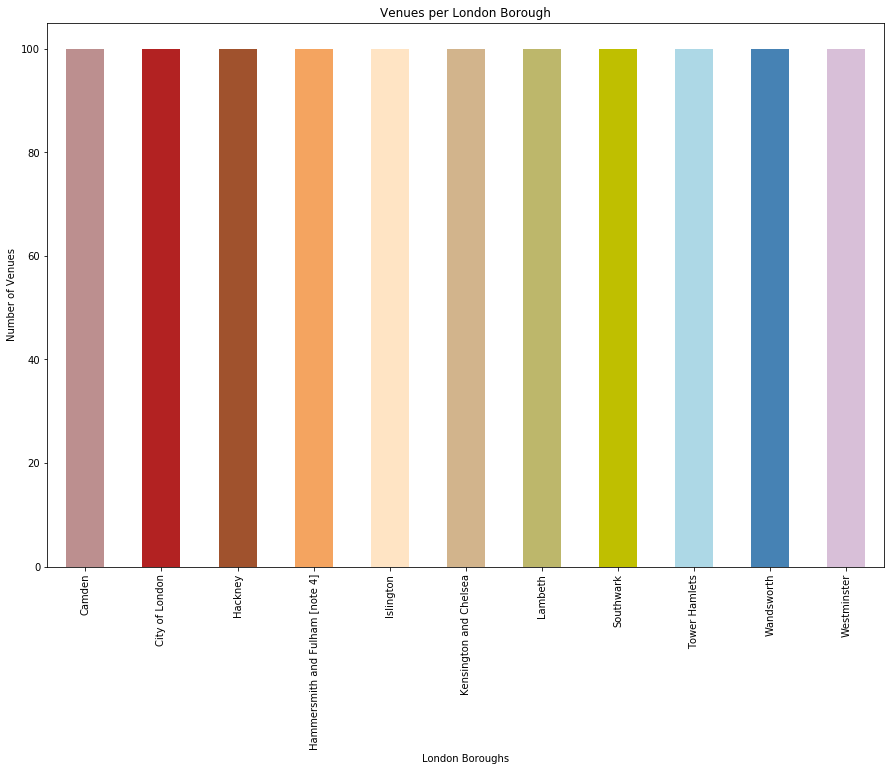

In [22]:
#Although available from the Dataframe above, we will still plot a bar chart to see the number of venues returned for each Boroughs.
colors_bar = ['rosybrown','firebrick','sienna','sandybrown','bisque','tan','darkkhaki','y','lightblue','steelblue','thistle']
London_venues_group.plot(x= 'Borough', y='Venue id',kind = "bar", figsize = (15,10), color=colors_bar, legend = None)
plt.xlabel('London Boroughs')
plt.ylabel('Number of Venues')
plt.title('Venues per London Borough')
plt.show()

### Finding the number of venues in each category

In [23]:
most_venues = London_venues.groupby('Venue Category').count().sort_values(by="Venue name", ascending=False)
most_venues

,Borough,Borough Latitude,Borough Longitude,Venue id,Venue name,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
Coffee Shop,82,82,82,82,82,82,82
Pub,69,69,69,69,69,69,69
Café,43,43,43,43,43,43,43
Park,43,43,43,43,43,43,43
Hotel,43,43,43,43,43,43,43
Bakery,29,29,29,29,29,29,29
Italian Restaurant,24,24,24,24,24,24,24
Pizza Place,24,24,24,24,24,24,24
Gym / Fitness Center,20,20,20,20,20,20,20


### Finding the Number of Categories per Borough and plotting the count on Bar Chart

Text(0, 0.5, 'Number of categories')

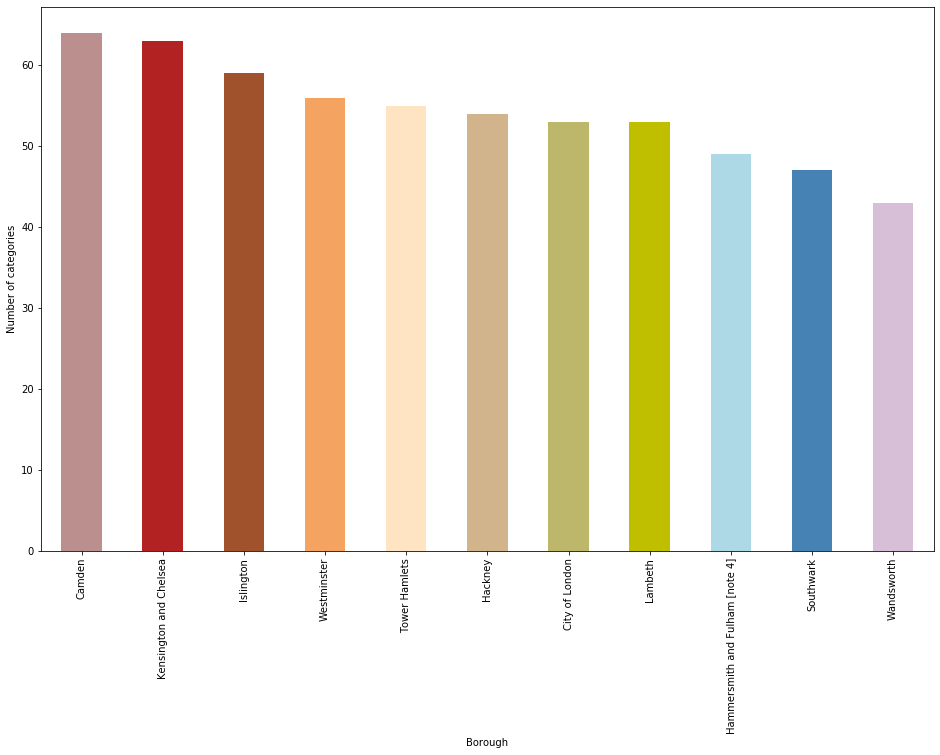

In [24]:
#The number of categories in each district
London_venues_group_cat = (
   London_venues.groupby(['Borough','Venue Category'])
        .count().reset_index()[['Borough', 'Venue Category']]
            .groupby('Borough').count().reset_index()
)
# Plotting Bar Chart of Different Venue Categories per Borough
ax = London_venues_group_cat.sort_values(by="Venue Category", ascending=False).plot(x="Borough", y="Venue Category", kind="bar", figsize=(16,10),color=colors_bar, legend=None)
ax.set_ylabel("Number of categories")

### Analyzing each London Borough

In [25]:
# Performing onehot coding

london_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
london_onehot['Borough'] = London_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Canal,Canal Lock,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Cheese Shop,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Outlet Mall,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Social Club,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sports Club,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Tiki Bar,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Lets examine the new dataframe's size

In [26]:
london_onehot.shape

(1100, 186)

### Grouping rows by Borough and taking the mean of the frequency of occurrence of each category

In [27]:
London_onehot_grouped = london_onehot.groupby('Borough').mean().reset_index()
London_onehot_grouped

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Canal,Canal Lock,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Cheese Shop,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Outlet Mall,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Social Club,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sports Club,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Tiki Bar,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,Camden,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.01,0.02,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.10,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.01,0.02,0.00,0.02,0.00,0.06,0.01,0.00,0.01,0.01,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00
1,City of London,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.01,0.01,0.02,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.03,0.13,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.00,0.01,0.00,0.09,0.00,0.00,0.01,0.02,0.00,0.

#### Confirming size of the new dataframe

In [28]:
London_onehot_grouped.shape

(11, 186)

#### Write a function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating a DataFrame to display Top 10 venues for each Borough

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Boroughs_venues_sorted = pd.DataFrame(columns=columns)
Boroughs_venues_sorted['Borough'] = London_onehot_grouped['Borough']

for ind in np.arange(London_onehot_grouped.shape[0]):
    Boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_onehot_grouped.iloc[ind, :], num_top_venues)

Boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Coffee Shop,Hotel,Bookstore,Pizza Place,Sushi Restaurant,Bakery,History Museum,Canal,Plaza,Breakfast Spot
1,City of London,Coffee Shop,Hotel,Scenic Lookout,Gym / Fitness Center,Seafood Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Food Truck,Grocery Store
2,Hackney,Pub,Coffee Shop,Bakery,Café,Park,Bookstore,Wine Shop,Brewery,Grocery Store,Gastropub
3,Hammersmith and Fulham [note 4],Pub,Coffee Shop,Café,Park,Gastropub,Pizza Place,French Restaurant,Turkish Restaurant,Japanese Restaurant,Italian Restaurant
4,Islington,Pub,Park,Coffee Shop,Café,Theater,Pizza Place,Mediterranean Restaurant,Gastropub,Cocktail Bar,Ethiopian Restaurant


## Clustering Boroughs using K-Means

#### We would consider data relating to only Coffee Shop, Hotel, Pub, Café, Plaza

In [31]:
Boroughs_venues_filtered = london_onehot[['Borough','Coffee Shop', 'Hotel', 'Pub','Café','Plaza']].groupby('Borough').sum()
Boroughs_venues_filtered

,Coffee Shop,Hotel,Pub,Café,Plaza
Borough,,,,,
Camden,10,6,1,2,2
City of London,13,9,1,1,0
Hackney,9,1,12,5,0
Hammersmith and Fulham [note 4],8,2,10,8,2
Islington,5,0,11,4,0
Kensington and Chelsea,1,2,6,5,0
Lambeth,8,0,8,4,0
Southwark,12,5,5,1,1
Tower Hamlets,8,7,4,1,3


In [32]:
#Adding Total Column for Total venues for each Borough
Boroughs_venues_filtered['Total Top Venues']=Boroughs_venues_filtered.sum(axis=1)
Boroughs_venues_filtered

,Coffee Shop,Hotel,Pub,Café,Plaza,Total Top Venues
Borough,,,,,,
Camden,10,6,1,2,2,21
City of London,13,9,1,1,0,24
Hackney,9,1,12,5,0,27
Hammersmith and Fulham [note 4],8,2,10,8,2,30
Islington,5,0,11,4,0,20
Kensington and Chelsea,1,2,6,5,0,14
Lambeth,8,0,8,4,0,20
Southwark,12,5,5,1,1,24
Tower Hamlets,8,7,4,1,3,23


#### We will consider the data relating to the Category 'Coffee Shop' Only

In [33]:
Boroughs_venues_coffee = London_onehot_grouped[['Borough', 'Coffee Shop']]
Boroughs_venues_coffee

,Borough,Coffee Shop
0,Camden,0.10
1,City of London,0.13
2,Hackney,0.09
3,Hammersmith and Fulham [note 4],0.08
4,Islington,0.05
5,Kensington and Chelsea,0.01
6,Lambeth,0.08
7,Southwark,0.12
8,Tower Hamlets,0.08
9,Wandsworth,0.07


We will cluster Boroughs based on Category Coffee Shop using K-Means. We will used elbow method to find out how many k's do we need for K-Means clustering

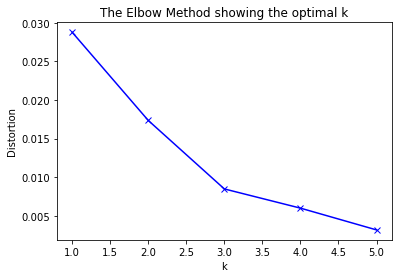

In [34]:
# we will try with 6 different values of k to find the best one

Ks = 6
distortions = []

london_coffee_clustering = Boroughs_venues_coffee.drop('Borough', 1)

for k in range(1, Ks):

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(london_coffee_clustering)

    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(london_coffee_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / london_coffee_clustering.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see from the above plot that the k elbow appears at 3

In [35]:
nclusters = 3
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(london_coffee_clustering)

We will create a new dataframe looks like **Boroughs_venues_coffee**  but contains the cluster labels for each district.

In [36]:
df_coffee = Boroughs_venues_coffee.copy()
df_coffee["Cluster Labels"] = kmeans.labels_

# add two columns Latitude and Logitude into cafe_merged
df_coffee = df_coffee.join(df_London_sorted.set_index("Borough"), on="Borough")

# sort the table by cluster labels
df_coffee.sort_values(["Cluster Labels"], inplace=True)

# Drop some unnecessary columns
#df_caf = df_cafe.drop(["Subdistrict", "Area (km2)"], axis=1)

# change to numeric data type
#df_cafe['Average Housing Price (1M VND)'] = df_cafe['Average Housing Price (1M VND)'].astype(float)

df_coffee

,Borough,Coffee Shop,Cluster Labels,Local authority,Area (sq mi),Population (2013 est)[1],Nr. in map,Longitude,Latitude
5,Kensington and Chelsea,0.01,0,Kensington and Chelsea London Borough Council,4.68,155594,3.0,-0.1947,51.5020
10,Westminster,0.01,0,Westminster City Council,8.29,226841,2.0,-0.1372,51.4973
0,Camden,0.10,1,Camden London Borough Council,8.40,229719,11.0,-0.1255,51.5290
1,City of London,0.13,1,Corporation of London,1.12,7000,1.0,-0.0922,51.5155
7,Southwark,0.12,1,Southwark London Borough Council,11.14,298464,7.0,-0.0804,51.5035
2,Hackney,0.09,2,Hackney London Borough Council,7.36,257379,9.0,-0.0553,51.5450
3,Hammersmith and Fulham [note 4],0.08,2,Hammersmith and Fulham London Borough Council,6.33,178685,4.0,-0.2339,51.4927
4,Islington,0.05,2,Islington London Borough Council,5.74,215667,10.0,-0.1022,51.5416
6,Lambeth,0.08,2,Lambeth London Borough Council,10.36,314242,6.0,-0.1163,51.4607
8,Tower Hamlets,0.08,2,Tower Hamlets London Borough Council,7.63,272890,8.0,-0.0059,51.5099


### Visualize the clusters on map

In [46]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i+x+(i*x)**3 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        df_coffee['Latitude'], 
        df_coffee['Longitude'], 
        df_coffee['Borough'], 
        df_coffee['Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Chloropeth map of Population 
We will create Chloropeth map with population and clusters created in the map above

In [47]:
# Downloading the GeoJson file for London 

!wget --quiet https://skgrange.github.io/www/data/london_boroughs.json -O london_boroughs.json
print('London GeoJson file downloaded')

London GeoJson file downloaded


In [48]:


london_geo = r'london_boroughs.json' # json file

map_ahp = folium.Map(location=[latitude, longitude], zoom_start=12)

map_ahp.choropleth(
 geo_data=london_geo,
 name='choropleth',
 data=df_coffee,
 columns=['Borough', 'Population (2013 est)[1]'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Borough Population')


# add clusters to the map
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        df_coffee['Latitude'], 
        df_coffee['Longitude'], 
        df_coffee['Borough'], 
        df_coffee['Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ahp)

map_ahp

#### Sorting the Boroughs_venues_filtered Dataframe by Number of Coffee Shops in each Borough to draw Meaningful Conclusion

In [49]:
Boroughs_venues_filtered.sort_values(by="Coffee Shop", ascending=False, inplace=True)
Boroughs_venues_filtered

,Coffee Shop,Hotel,Pub,Café,Plaza,Total Top Venues
Borough,,,,,,
City of London,13,9,1,1,0,24
Southwark,12,5,5,1,1,24
Camden,10,6,1,2,2,21
Hackney,9,1,12,5,0,27
Hammersmith and Fulham [note 4],8,2,10,8,2,30
Lambeth,8,0,8,4,0,20
Tower Hamlets,8,7,4,1,3,23
Wandsworth,7,0,11,7,0,25
Islington,5,0,11,4,0,20


### Conclusion

From the above Chloropeth map we can conclude that the as the highest concentration of population is in the dark green shaded area, the Boroughs of Wandsworth, Lambeth, Southwark and Tower Hamlets are all the possible options to open the cult coffee shops.

Further sophisticated Data analysis incorporating metrics on the client footfall, population habits, proximity of office areas, tourist attractions and commerical rental prices would be beneficial in identifying the exact location for opening the cult coffee chain